In [1]:
import pandas as pd
import numpy as np

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

## Calculate Abnormal Returns

The Abnormal formula:

$$AR_{i,t} = R_{i,t} - E(R_{i,t})$$

Where:
- $AR_{i,t}$: Abnormal return for asset 𝑖 at time 𝑡;
- $R_{i,t}$: Actual return for asset 𝑖 at time 𝑡;
- $E(R_{i,t})$: Expected return for asset 𝑖 at time 𝑡;
Calculate Actual Returns: The actual return for a given period is usually calculated using the formula:

$$R_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}}$$

Calculate Expected Returns: Expected returns can be estimated in different ways, such as:

$E(R_{i,t}) = \alpha_i + \beta_i \cdot R_{M,t}$

$\alpha_i$ and $\beta_i$ are the intercept and slope coefficients obtained from a regression of the asset's returns on the market returns $R_{M,t}$

CAPM (Capital Asset Pricing Model): Another method to calculate expected returns is through the CAPM model:

$$E(R_{i,t}) = R_f + \beta_i \cdot (R_{M,t} - R_f)$$

Where:
- $R_f$: is the risk-free rate (e.g., the return on government bonds);
- $R_{M,t}$: is the return of the market at time;
- $\beta_i$: is the asset's sensitivity to the market.;

In [3]:
df = pd.read_excel("Japan rate.xlsx", sheet_name = 'Price')

In [4]:
df_index = pd.read_excel("Japan rate.xlsx", sheet_name = 'Index')

In [5]:
df_index.head()

,Exchange Date,Close
0,29-thg 12-2023,72608.48
1,28-thg 12-2023,72619.64
2,27-thg 12-2023,72125.27
3,26-thg 12-2023,71919.83
4,25-thg 12-2023,71731.93


In [6]:
data = pd.merge(df,df_index, left_on = 'Date', right_on ='Exchange Date', how= 'inner' )

In [7]:
data = data.drop("Exchange Date", axis =1)

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-thg %m-%Y')
data.head()

,Date,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,...,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,Close
0,2023-12-29,"3.770,0","759,1","2.776,0","3.915,0","1.736,0","3.085,0","2.520,0","1.859,0","1.095,0",...,"2.871,0","1.441,0","3.710,0","17,7","1.765,0","1.612,0","4.595,0","3.205,0","18.880,0",72608.48
1,2023-12-28,"3.770,0","759,9","2.765,5","3.895,0","1.741,0","3.095,0","2.512,0","1.846,0","1.082,0",...,"2.898,0","1.434,0","3.695,0","18,0","1.761,0","1.616,0","4.650,0","3.211,0","18.925,0",72619.64
2,2023-12-27,"3.755,0","771,0","2.767,5","3.880,0","1.720,0","3.025,0","2.504,0","1.864,5","1.057,0",...,"2.892,0","1.425,0","3.665,0","17,8","1.752,0","1.665,0","4.600,0","3.188,0","19.035,0",72125.27
3,2023-12-26,"3.730,0","766,7","2.749,5","3.860,0","1.713,0","3.045,0","2.445,0","1.849,0","1.043,0",...,"2.898,0","1.407,0","3.570,0","17,5","1.744,0","1.652,0","4.545,0","3.210,0","18.600,0",71919.83
4,2023-12-25,"3.715,0","764,3","2.751,0","3.840,0","1.723,0","3.020,0","2.492,0","1.842,5","1.036,0",...,"2.865,0","1.405,0","3.650,0","17,5","1.743,0","1.659,0","4.525,0","3.231,0","18.575,0",71731.93


In [9]:
# Giả sử bạn có DataFrame df_ar

# Bước 1: Loại bỏ dấu chấm (phần nghìn) và thay phẩy thành dấu chấm
data = data.replace({r'\.': ''}, regex=True)  # Loại bỏ dấu chấm
data = data.replace({r',': '.'}, regex=True)  # Thay phẩy thành dấu chấm

# Bước 2: Chuyển dữ liệu thành kiểu float
data = data.apply(pd.to_numeric, errors='coerce')

# Kiểm tra lại kết quả
#print(df_ar.head())

In [10]:
type(data["Kyokuyo"][100])

numpy.float64

In [11]:
row_types = df.iloc[4].apply(type)  # Kiểm tra kiểu dữ liệu của từng phần tử trong hàng đầu tiên

# Lọc các phần tử không phải là float
non_float_values = row_types[row_types != float]
print(non_float_values)

Date                  <class 'str'>
Kyokuyo               <class 'str'>
Nissui                <class 'str'>
Maruha Nichiro        <class 'str'>
Sakata Seed Corp      <class 'str'>
                          ...      
Yellow Hat            <class 'str'>
Ines Corp             <class 'str'>
Kato Sangyo           <class 'str'>
Yoshinoya Holdings    <class 'str'>
Nitori Holdings       <class 'str'>
Name: 4, Length: 101, dtype: object


In [12]:
df_return = data.iloc[:,1:].pct_change(-1)*100
df_return.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_18996/1503611947.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_return = data.iloc[:,1:].pct_change(-1)*100


,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,Close
0,0.000000,-0.105277,0.379678,0.513479,-0.287191,-0.323102,0.318471,0.704225,1.201479,-2.251407,...,-0.931677,0.488145,0.405954,-1.666667,0.227144,-0.247525,-1.182796,-0.186858,-0.237781,-0.015368
1,0.399467,-1.439689,-0.072267,0.386598,1.220930,2.314050,0.319489,-0.992223,2.365184,-0.929368,...,0.207469,0.631579,0.818554,1.123596,0.513699,-2.942943,1.086957,0.721455,-0.577883,0.685432
2,0.670241,0.560845,0.654664,0.518135,0.408640,-0.656814,2.413088,0.838291,1.342282,2.087287,...,-0.207039,1.279318,2.661064,1.714286,0.458716,0.786925,1.210121,-0.685358,2.338710,0.285651
3,0.403769,0.314013,-0.054526,0.520833,-0.580383,0.827815,-1.886035,0.352782,0.675676,0.957854,...,1.151832,0.142349,-2.191781,0.000000,0.057372,-0.421941,0.441989,-0.649954,0.134590,0.261948
4,-0.268456,0.196644,0.401460,-0.518135,-0.462161,-0.165289,0.160772,-0.593472,-0.766284,-0.191205,...,-0.139421,1.444043,-0.544959,0.000000,-0.400000,-0.060241,1.343785,2.182163,0.704798,-0.005938


In [13]:
df_return = df_return.round(2)

In [14]:
df_return.head()

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,Close
0,0.00,-0.11,0.38,0.51,-0.29,-0.32,0.32,0.70,1.20,-2.25,...,-0.93,0.49,0.41,-1.67,0.23,-0.25,-1.18,-0.19,-0.24,-0.02
1,0.40,-1.44,-0.07,0.39,1.22,2.31,0.32,-0.99,2.37,-0.93,...,0.21,0.63,0.82,1.12,0.51,-2.94,1.09,0.72,-0.58,0.69
2,0.67,0.56,0.65,0.52,0.41,-0.66,2.41,0.84,1.34,2.09,...,-0.21,1.28,2.66,1.71,0.46,0.79,1.21,-0.69,2.34,0.29
3,0.40,0.31,-0.05,0.52,-0.58,0.83,-1.89,0.35,0.68,0.96,...,1.15,0.14,-2.19,0.00,0.06,-0.42,0.44,-0.65,0.13,0.26
4,-0.27,0.20,0.40,-0.52,-0.46,-0.17,0.16,-0.59,-0.77,-0.19,...,-0.14,1.44,-0.54,0.00,-0.40,-0.06,1.34,2.18,0.70,-0.01


In [15]:
df_return = df_return.drop(index= 1954)

In [16]:
results ={}
x= df_return['Close'].values
for company in df_return.iloc[:,:-1].columns:
    y= df_return.iloc[:,:-1][company].values
    
    slope, intercept = np.polyfit(x, y, 1)
    results[company] = {"slope (beta)": slope, "intercept (alpha)": intercept}
    
results_df = pd.DataFrame(results).T
print(results_df)

                    slope (beta)  intercept (alpha)
Kyokuyo                 0.163056           0.016064
Nissui                  0.283485           0.010758
Maruha Nichiro          0.156036           0.021590
Sakata Seed Corp        0.177524           0.023667
Hokuto                  0.146034          -0.016050
...                          ...                ...
Yellow Hat              0.293713           0.019207
Ines Corp               0.386279           0.019065
Kato Sangyo             0.215773           0.029401
Yoshinoya Holdings      0.116036           0.043167
Nitori Holdings         0.234884           0.037343

[100 rows x 2 columns]


In [17]:
# results_df.reset_index(inplace=True)
# results_df.rename(columns={'index': 'Company'}, inplace=True)

In [18]:
abnormal_returns = pd.DataFrame(index=df_return.index, columns=df_return.columns)
market_returns = df_return['Close']
for company in df_return.iloc[:,:-1].columns:
    # Lấy alpha và beta của công ty từ results_df
    alpha = results_df.loc[company, 'intercept (alpha)']
    beta = results_df.loc[company, 'slope (beta)']
    
    # Tính expected return: alpha + beta * market returns
    expected_return = alpha + beta * market_returns
    
    # Tính abnormal return: actual return - expected return
    abnormal_return = df_return[company] - expected_return
    abnormal_returns[company] = abnormal_return

print(abnormal_returns)

       Kyokuyo    Nissui  Maruha Nichiro  Sakata Seed Corp    Hokuto  \
0    -0.012803 -0.115088        0.361531          0.489883 -0.271029   
1     0.271427 -1.646362       -0.199255          0.243841  1.135287   
2     0.606650  0.467032        0.583159          0.444851  0.383700   
3     0.341541  0.225536       -0.112160          0.450176 -0.601919   
4    -0.284434  0.192077        0.379970         -0.541892 -0.442489   
...        ...       ...             ...               ...       ...   
1949 -2.218128 -2.629574       -2.854426         -3.034140 -2.457886   
1950 -0.304536  0.440985        0.496428         -2.094905 -1.560932   
1951 -1.548869 -1.368834       -1.076328         -3.801876  0.084309   
1952  0.148622  1.995562        0.336007          0.615632 -2.816455   
1953  0.290127 -6.254308        0.416918         -0.362250 -0.292141   

      West Holdings  Fukui Computer Holdings  Mirait One  \
0         -0.445801                 0.273201    0.673087   
1          1.97

In [19]:
abnormal_returns = abnormal_returns.round(3)
abnormal_returns = abnormal_returns.drop("Close", axis=1)

In [20]:
abnormal_returns["average_ar"] = abnormal_returns.mean(axis=1)

C:\Users\DELL\AppData\Local\Temp/ipykernel_18996/265193776.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abnormal_returns["average_ar"] = abnormal_returns.mean(axis=1)


In [21]:
abnormal_returns["Date"] = data[['Date']]

C:\Users\DELL\AppData\Local\Temp/ipykernel_18996/1767018915.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  abnormal_returns["Date"] = data[['Date']]


In [22]:
abnormal_returns

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,average_ar,Date
0,-0.013,-0.115,0.362,0.490,-0.271,-0.446,0.273,0.673,1.058,-2.285,...,0.490,0.337,-1.713,0.217,-0.261,-1.205,-0.231,-0.273,0.27860,1703808000000000000
1,0.271,-1.646,-0.199,0.244,1.135,1.976,0.062,-1.234,2.026,-1.232,...,0.468,0.440,0.886,0.288,-3.226,0.912,0.597,-0.779,0.27077,1703721600000000000
2,0.607,0.467,0.583,0.445,0.384,-0.877,2.271,0.718,1.110,1.938,...,1.209,2.453,1.584,0.356,0.659,1.118,-0.767,2.235,1.16473,1703635200000000000
3,0.342,0.226,-0.112,0.450,-0.602,0.622,-2.020,0.238,0.458,0.820,...,0.076,-2.384,-0.118,-0.036,-0.539,0.354,-0.723,0.032,0.09694,1703548800000000000
4,-0.284,0.192,0.380,-0.542,-0.442,-0.299,0.110,-0.620,-0.915,-0.229,...,1.438,-0.618,-0.046,-0.416,-0.075,1.313,2.138,0.665,-0.20278,1703462400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,-2.218,-2.630,-2.854,-3.034,-2.458,-3.969,-4.170,-4.099,-4.877,-3.272,...,-2.179,-3.575,-3.679,-3.607,-6.757,-1.556,-0.700,-4.132,-3.62344,1452556800000000000
1950,-0.305,0.441,0.496,-2.095,-1.561,-0.275,-3.134,-1.940,-2.786,-0.865,...,-1.091,0.134,-1.114,1.588,1.094,-0.532,-2.135,1.150,-0.96876,1452211200000000000
1951,-1.549,-1.369,-1.076,-3.802,0.084,-2.303,3.873,1.216,0.334,-3.286,...,-1.197,-0.427,0.408,-3.150,-4.862,0.767,-0.426,-3.338,-0.50229,1452124800000000000
1952,0.149,1.996,0.336,0.616,-2.816,-3.345,-4.112,-0.645,-0.782,-1.564,...,-0.404,-0.445,2.693,-2.663,2.061,-1.261,-1.016,-1.810,0.27626,1452038400000000000


In [23]:
data.head()

,Date,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,...,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,Close
0,1703808000000000000,3770.0,759.1,2776.0,3915.0,1736.0,3085.0,2520.0,1859.0,1095.0,...,2871.0,1441.0,3710.0,17.7,1765.0,1612.0,4595.0,3205.0,18880.0,72608.48
1,1703721600000000000,3770.0,759.9,2765.5,3895.0,1741.0,3095.0,2512.0,1846.0,1082.0,...,2898.0,1434.0,3695.0,18.0,1761.0,1616.0,4650.0,3211.0,18925.0,72619.64
2,1703635200000000000,3755.0,771.0,2767.5,3880.0,1720.0,3025.0,2504.0,1864.5,1057.0,...,2892.0,1425.0,3665.0,17.8,1752.0,1665.0,4600.0,3188.0,19035.0,72125.27
3,1703548800000000000,3730.0,766.7,2749.5,3860.0,1713.0,3045.0,2445.0,1849.0,1043.0,...,2898.0,1407.0,3570.0,17.5,1744.0,1652.0,4545.0,3210.0,18600.0,71919.83
4,1703462400000000000,3715.0,764.3,2751.0,3840.0,1723.0,3020.0,2492.0,1842.5,1036.0,...,2865.0,1405.0,3650.0,17.5,1743.0,1659.0,4525.0,3231.0,18575.0,71731.93


In [24]:
ar_plot = abnormal_returns[["average_ar","Date"]]

In [25]:
ar_plot

,average_ar,Date
0,0.27860,1703808000000000000
1,0.27077,1703721600000000000
2,1.16473,1703635200000000000
3,0.09694,1703548800000000000
4,-0.20278,1703462400000000000
...,...,...
1949,-3.62344,1452556800000000000
1950,-0.96876,1452211200000000000
1951,-0.50229,1452124800000000000
1952,0.27626,1452038400000000000


In [26]:
ar_plot['Date'] = pd.to_datetime(ar_plot['Date'],unit='ns')#format='%Y-%m-%d %H:%M:%S')
ar_plot['Quarter'] = ar_plot['Date'].dt.to_period('Q')

C:\Users\DELL\AppData\Local\Temp/ipykernel_18996/2657657834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_plot['Date'] = pd.to_datetime(ar_plot['Date'],unit='ns')#format='%Y-%m-%d %H:%M:%S')
C:\Users\DELL\AppData\Local\Temp/ipykernel_18996/2657657834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar_plot['Quarter'] = ar_plot['Date'].dt.to_period('Q')


In [27]:
ar_plot['Date']

0      2023-12-29
1      2023-12-28
2      2023-12-27
3      2023-12-26
4      2023-12-25
          ...    
1949   2016-01-12
1950   2016-01-08
1951   2016-01-07
1952   2016-01-06
1953   2016-01-05
Name: Date, Length: 1954, dtype: datetime64[ns]

In [28]:
ar_plot.head()

,average_ar,Date,Quarter
0,0.27860,2023-12-29,2023Q4
1,0.27077,2023-12-28,2023Q4
2,1.16473,2023-12-27,2023Q4
3,0.09694,2023-12-26,2023Q4
4,-0.20278,2023-12-25,2023Q4


In [29]:
ar_plot = ar_plot.sort_values('Date')
ar_plot.head()

,average_ar,Date,Quarter
1953,-0.11683,2016-01-05,2016Q1
1952,0.27626,2016-01-06,2016Q1
1951,-0.50229,2016-01-07,2016Q1
1950,-0.96876,2016-01-08,2016Q1
1949,-3.62344,2016-01-12,2016Q1


ConversionError: Failed to convert value(s) to axis units: 1953    2016Q1
1948    2016Q1
1943    2016Q1
1938    2016Q1
1933    2016Q1
         ...  
23      2023Q4
18      2023Q4
13      2023Q4
8       2023Q4
3       2023Q4
Name: Quarter, Length: 391, dtype: object

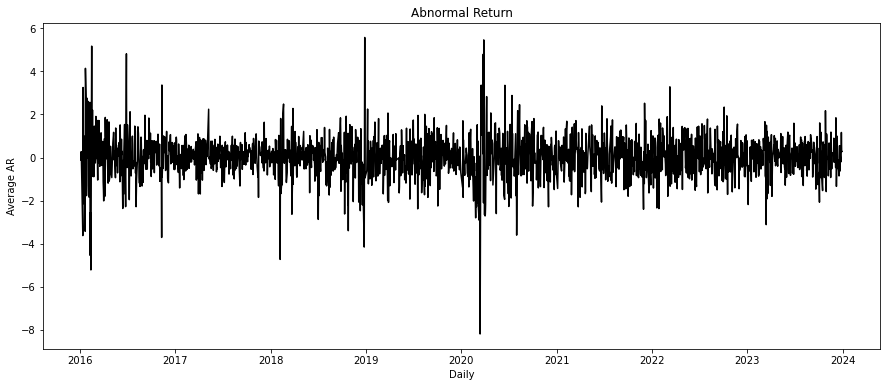

In [30]:
import matplotlib.ticker as ticker
plt.figure(figsize=(15, 6))
plt.plot(ar_plot["Date"].values, ar_plot["average_ar"].values, linestyle='-', color='black')
plt.title('Abnormal Return')
plt.xlabel('Daily')
plt.ylabel('Average AR')

# Thêm label cho quý trên trục x
plt.xticks( ar_plot['Quarter'].astype(str)[::5], rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both'))
plt.tight_layout()
plt.show()

In [ ]:
ar_plot["Date"] = pd.to_datetime(ar_plot['Date'], format='%Y-%m-%d %H:%M:%S').dt.date

In [ ]:
ar_plot.to_excel(r'C:\Users\DELL\Desktop\financial materials\ab_re.xlsx')

## Calculation Herding behavior

Herding Index Formula:

The Herding Index (HI) measures the degree to which an asset's return mimics the market's return. It is calculated as:

$$HI_t = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{|r_{i,t} - r_{m,t}|}{|r_{m,t}|} \right)$$

Where:

- $HI_t$= Herding Index at time;
- $𝑁$ = Total number of assets in the market (or the sample size);
- $r_{i,t}$= Return of asset 𝑖 at time 𝑡;
- $r_{m,t}$= Return of the market at time 𝑡

In [31]:
df_2 = df_return

In [32]:
df_2.head()

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,Close
0,0.00,-0.11,0.38,0.51,-0.29,-0.32,0.32,0.70,1.20,-2.25,...,-0.93,0.49,0.41,-1.67,0.23,-0.25,-1.18,-0.19,-0.24,-0.02
1,0.40,-1.44,-0.07,0.39,1.22,2.31,0.32,-0.99,2.37,-0.93,...,0.21,0.63,0.82,1.12,0.51,-2.94,1.09,0.72,-0.58,0.69
2,0.67,0.56,0.65,0.52,0.41,-0.66,2.41,0.84,1.34,2.09,...,-0.21,1.28,2.66,1.71,0.46,0.79,1.21,-0.69,2.34,0.29
3,0.40,0.31,-0.05,0.52,-0.58,0.83,-1.89,0.35,0.68,0.96,...,1.15,0.14,-2.19,0.00,0.06,-0.42,0.44,-0.65,0.13,0.26
4,-0.27,0.20,0.40,-0.52,-0.46,-0.17,0.16,-0.59,-0.77,-0.19,...,-0.14,1.44,-0.54,0.00,-0.40,-0.06,1.34,2.18,0.70,-0.01


In [33]:
difference = df_2.iloc[:,:-1] - df_2['Close'].values[:, None]
abs_df = difference.abs()

In [34]:
CSAD_df = {}
CSAD_df['CSAD']= abs_df.mean(axis=1)
CSAD_df = pd.DataFrame(CSAD_df)
CSAD_df['Date'] = pd.to_datetime(df['Date'], format='%d-thg %m-%Y')

In [35]:
CSAD_df

,CSAD,Date
0,0.7300,2023-12-29
1,1.2209,2023-12-28
2,1.0959,2023-12-27
3,0.5971,2023-12-26
4,0.8729,2023-12-25
...,...,...
1949,3.5312,2016-01-12
1950,1.3644,2016-01-08
1951,1.5035,2016-01-07
1952,1.5284,2016-01-06


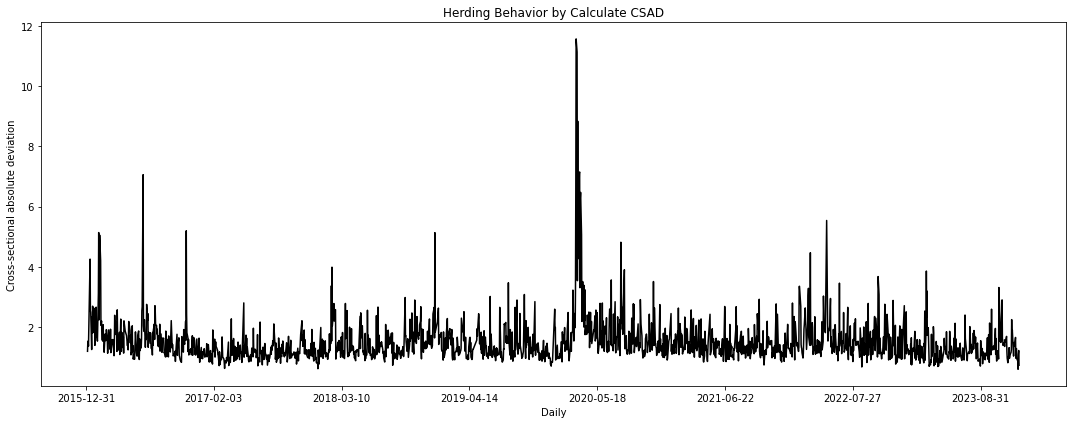

In [37]:
import matplotlib.ticker as ticker

# Sort the dataframe by 'Date'
CSAD_df = CSAD_df.sort_values('Date')

# Extract quarter information from 'Date' and assign it to 'Quarter'
CSAD_df['Quarter'] = CSAD_df['Date'].dt.to_period('Q')

# Create the plot
plt.figure(figsize=(15, 6))

# Plot 'CSAD' against 'Date'
plt.plot(CSAD_df['Date'].values, CSAD_df['CSAD'].values, linestyle='-', color='black')

# Set the title and labels
plt.title('Herding Behavior by Calculate CSAD')
plt.xlabel('Daily')
plt.ylabel('Cross-sectional absolute deviation')

# Adding quarter labels on the x-axis
# Ensure that the quarter labels do not overlap
quarter_labels = CSAD_df['Quarter'].astype(str)
#plt.xticks(CSAD_df['Date'][::60], quarter_labels[::60], rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both'))
# Add grid for better readability
#plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
CSAD_df.to_excel(r'C:\Users\DELL\Desktop\financial materials\CSAD.xlsx')

## Loss Aversion

The Loss Aversion is measured (Barberis and Huang, 2001) as follows:

$$X_{i,t+1} = S_{i,t} R_{i,t+1} - S_{i,t} R_{f,t} \quad \text{(3)}$$

Where:
- \(X_{i,t+1}\) represents the measures of the gain or loss on stock \(i\) between time \((t-1)\) and time \(t\);
- \(S_{i,t}\) is the reference price of share \(i\) at time \(t\);
- \(R_{i,t+1}\) represents the expected future return;
- \(R_{f,t}\) is the risk-free rate (Treasury bill rate).

The gain was equal to the value of stock \(i\) at time \(t+1\) minus its value at time \(t\), multiplied by the risk-free rate.


In [38]:
df_3 = df_return
df_3.head()

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,Close
0,0.00,-0.11,0.38,0.51,-0.29,-0.32,0.32,0.70,1.20,-2.25,...,-0.93,0.49,0.41,-1.67,0.23,-0.25,-1.18,-0.19,-0.24,-0.02
1,0.40,-1.44,-0.07,0.39,1.22,2.31,0.32,-0.99,2.37,-0.93,...,0.21,0.63,0.82,1.12,0.51,-2.94,1.09,0.72,-0.58,0.69
2,0.67,0.56,0.65,0.52,0.41,-0.66,2.41,0.84,1.34,2.09,...,-0.21,1.28,2.66,1.71,0.46,0.79,1.21,-0.69,2.34,0.29
3,0.40,0.31,-0.05,0.52,-0.58,0.83,-1.89,0.35,0.68,0.96,...,1.15,0.14,-2.19,0.00,0.06,-0.42,0.44,-0.65,0.13,0.26
4,-0.27,0.20,0.40,-0.52,-0.46,-0.17,0.16,-0.59,-0.77,-0.19,...,-0.14,1.44,-0.54,0.00,-0.40,-0.06,1.34,2.18,0.70,-0.01


In [39]:
df_price = df
df_price.head()

,Date,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,...,Yamada Holdings,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings
0,29-thg 12-2023,"3.770,0","759,1","2.776,0","3.915,0","1.736,0","3.085,0","2.520,0","1.859,0","1.095,0",...,"438,4","2.871,0","1.441,0","3.710,0","17,7","1.765,0","1.612,0","4.595,0","3.205,0","18.880,0"
1,28-thg 12-2023,"3.770,0","759,9","2.765,5","3.895,0","1.741,0","3.095,0","2.512,0","1.846,0","1.082,0",...,"436,4","2.898,0","1.434,0","3.695,0","18,0","1.761,0","1.616,0","4.650,0","3.211,0","18.925,0"
2,27-thg 12-2023,"3.755,0","771,0","2.767,5","3.880,0","1.720,0","3.025,0","2.504,0","1.864,5","1.057,0",...,"433,8","2.892,0","1.425,0","3.665,0","17,8","1.752,0","1.665,0","4.600,0","3.188,0","19.035,0"
3,26-thg 12-2023,"3.730,0","766,7","2.749,5","3.860,0","1.713,0","3.045,0","2.445,0","1.849,0","1.043,0",...,"428,0","2.898,0","1.407,0","3.570,0","17,5","1.744,0","1.652,0","4.545,0","3.210,0","18.600,0"
4,25-thg 12-2023,"3.715,0","764,3","2.751,0","3.840,0","1.723,0","3.020,0","2.492,0","1.842,5","1.036,0",...,"428,0","2.865,0","1.405,0","3.650,0","17,5","1.743,0","1.659,0","4.525,0","3.231,0","18.575,0"


In [40]:
df_price["Date"] =pd.to_datetime(df_price["Date"], format='%d-thg %m-%Y')
df_price["Date"]

0      2023-12-29
1      2023-12-28
2      2023-12-27
3      2023-12-26
4      2023-12-25
          ...    
1950   2016-01-08
1951   2016-01-07
1952   2016-01-06
1953   2016-01-05
1954   2016-01-04
Name: Date, Length: 1955, dtype: datetime64[ns]

In [41]:
df_jp_rate = pd.read_excel("Japan rate.xlsx", sheet_name="Japan rate")

In [42]:
df_jp_rate = df_jp_rate.iloc[:, :2]

In [43]:
df_jp_rate["Date"] = pd.to_datetime(df_jp_rate["Date"],format='%d-thg %m-%Y')
df_jp_rate["Date"]

0      2023-12-29
1      2023-12-28
2      2023-12-27
3      2023-12-26
4      2023-12-25
          ...    
1950   2016-01-08
1951   2016-01-07
1952   2016-01-06
1953   2016-01-05
1954   2016-01-04
Name: Date, Length: 1955, dtype: datetime64[ns]

### Merge tables

In [44]:
df_time_t = pd.merge(df_price,df_jp_rate, on="Date", how="inner")
df_time_t

,Date,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,...,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,Rate
0,2023-12-29,"3.770,0","759,1","2.776,0","3.915,0","1.736,0","3.085,0","2.520,0","1.859,0","1.095,0",...,"2.871,0","1.441,0","3.710,0","17,7","1.765,0","1.612,0","4.595,0","3.205,0","18.880,0","-0,12106009070294788"
1,2023-12-28,"3.770,0","759,9","2.765,5","3.895,0","1.741,0","3.095,0","2.512,0","1.846,0","1.082,0",...,"2.898,0","1.434,0","3.695,0","18,0","1.761,0","1.616,0","4.650,0","3.211,0","18.925,0","-0,12106009070294788"
2,2023-12-27,"3.755,0","771,0","2.767,5","3.880,0","1.720,0","3.025,0","2.504,0","1.864,5","1.057,0",...,"2.892,0","1.425,0","3.665,0","17,8","1.752,0","1.665,0","4.600,0","3.188,0","19.035,0","-0,12106009070294788"
3,2023-12-26,"3.730,0","766,7","2.749,5","3.860,0","1.713,0","3.045,0","2.445,0","1.849,0","1.043,0",...,"2.898,0","1.407,0","3.570,0","17,5","1.744,0","1.652,0","4.545,0","3.210,0","18.600,0","-0,12106009070294788"
4,2023-12-25,"3.715,0","764,3","2.751,0","3.840,0","1.723,0","3.020,0","2.492,0","1.842,5","1.036,0",...,"2.865,0","1.405,0","3.650,0","17,5","1.743,0","1.659,0","4.525,0","3.231,0","18.575,0","-0,12106009070294788"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,2016-01-08,"2.700,0","642,0","2.032,0","2.670,0","2.205,0","411,2","1.229,0","951,0","105,0",...,"1.401,0","1.230,0","735,0","8,2","1.145,0","1.092,0","2.773,0","1.502,0","9.470,0","0,17767502834467114"
1951,2016-01-07,"2.710,0","640,0","2.023,0","2.729,0","2.242,0","412,4","1.270,0","971,0","108,0",...,"1.431,5","1.245,0","735,0","8,3","1.128,5","1.082,0","2.790,0","1.535,0","9.370,0","0,17767502834467114"
1952,2016-01-06,"2.760,0","652,0","2.050,0","2.845,0","2.246,0","423,7","1.228,0","964,0","108,0",...,"1.462,5","1.265,0","743,0","8,3","1.171,0","1.145,0","2.778,0","1.544,0","9.730,0","0,17767502834467114"
1953,2016-01-05,"2.760,0","641,0","2.046,0","2.832,0","2.315,0","439,1","1.284,0","973,0","109,0",...,"1.467,0","1.273,0","749,0","8,1","1.206,5","1.126,0","2.819,0","1.561,0","9.930,0","0,17767502834467114"


In [45]:
df_time_t.iloc[:, 1:-1]

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Yamada Holdings,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings
0,"3.770,0","759,1","2.776,0","3.915,0","1.736,0","3.085,0","2.520,0","1.859,0","1.095,0","5.210,0",...,"438,4","2.871,0","1.441,0","3.710,0","17,7","1.765,0","1.612,0","4.595,0","3.205,0","18.880,0"
1,"3.770,0","759,9","2.765,5","3.895,0","1.741,0","3.095,0","2.512,0","1.846,0","1.082,0","5.330,0",...,"436,4","2.898,0","1.434,0","3.695,0","18,0","1.761,0","1.616,0","4.650,0","3.211,0","18.925,0"
2,"3.755,0","771,0","2.767,5","3.880,0","1.720,0","3.025,0","2.504,0","1.864,5","1.057,0","5.380,0",...,"433,8","2.892,0","1.425,0","3.665,0","17,8","1.752,0","1.665,0","4.600,0","3.188,0","19.035,0"
3,"3.730,0","766,7","2.749,5","3.860,0","1.713,0","3.045,0","2.445,0","1.849,0","1.043,0","5.270,0",...,"428,0","2.898,0","1.407,0","3.570,0","17,5","1.744,0","1.652,0","4.545,0","3.210,0","18.600,0"
4,"3.715,0","764,3","2.751,0","3.840,0","1.723,0","3.020,0","2.492,0","1.842,5","1.036,0","5.220,0",...,"428,0","2.865,0","1.405,0","3.650,0","17,5","1.743,0","1.659,0","4.525,0","3.231,0","18.575,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,"2.700,0","642,0","2.032,0","2.670,0","2.205,0","411,2","1.229,0","951,0","105,0","2.450,0",...,"530,0","1.401,0","1.230,0","735,0","8,2","1.145,0","1.092,0","2.773,0","1.502,0","9.470,0"
1951,"2.710,0","640,0","2.023,0","2.729,0","2.242,0","412,4","1.270,0","971,0","108,0","2.475,0",...,"532,0","1.431,5","1.245,0","735,0","8,3","1.128,5","1.082,0","2.790,0","1.535,0","9.370,0"
1952,"2.760,0","652,0","2.050,0","2.845,0","2.246,0","423,7","1.228,0","964,0","108,0","2.575,0",...,"536,0","1.462,5","1.265,0","743,0","8,3","1.171,0","1.145,0","2.778,0","1.544,0","9.730,0"
1953,"2.760,0","641,0","2.046,0","2.832,0","2.315,0","439,1","1.284,0","973,0","109,0","2.625,0",...,"538,0","1.467,0","1.273,0","749,0","8,1","1.206,5","1.126,0","2.819,0","1.561,0","9.930,0"


In [46]:
# Giả sử bạn có DataFrame df_ar

# Bước 1: Loại bỏ dấu chấm (phần nghìn) và thay phẩy thành dấu chấm
df_time_t = df_time_t.replace({r'\.': ''}, regex=True)  # Loại bỏ dấu chấm
df_time_t = df_time_t.replace({r',': '.'}, regex=True)  # Thay phẩy thành dấu chấm

# Bước 2: Chuyển dữ liệu thành kiểu float
df_time_t = df_time_t.apply(pd.to_numeric, errors='coerce')

# Kiểm tra lại kết quả
#print(df_ar.head())

In [47]:
sr_t = df_time_t.iloc[:, 1:-1].multiply(df_time_t["Rate"], axis=0)

In [48]:
sr_t =sr_t.round(2)
sr_t

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Yamada Holdings,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings
0,-456.40,-91.90,-336.06,-473.95,-210.16,-373.47,-305.07,-225.05,-132.56,-630.72,...,-53.07,-347.56,-174.45,-449.13,-2.14,-213.67,-195.15,-556.27,-388.00,-2285.61
1,-456.40,-91.99,-334.79,-471.53,-210.77,-374.68,-304.10,-223.48,-130.99,-645.25,...,-52.83,-350.83,-173.60,-447.32,-2.18,-213.19,-195.63,-562.93,-388.72,-2291.06
2,-454.58,-93.34,-335.03,-469.71,-208.22,-366.21,-303.13,-225.72,-127.96,-651.30,...,-52.52,-350.11,-172.51,-443.69,-2.15,-212.10,-201.57,-556.88,-385.94,-2304.38
3,-451.55,-92.82,-332.85,-467.29,-207.38,-368.63,-295.99,-223.84,-126.27,-637.99,...,-51.81,-350.83,-170.33,-432.18,-2.12,-211.13,-199.99,-550.22,-388.60,-2251.72
4,-449.74,-92.53,-333.04,-464.87,-208.59,-365.60,-301.68,-223.05,-125.42,-631.93,...,-51.81,-346.84,-170.09,-441.87,-2.12,-211.01,-200.84,-547.80,-391.15,-2248.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,479.72,114.07,361.04,474.39,391.77,73.06,218.36,168.97,18.66,435.30,...,94.17,248.92,218.54,130.59,1.46,203.44,194.02,492.69,266.87,1682.58
1951,481.50,113.71,359.44,484.88,398.35,73.27,225.65,172.52,19.19,439.75,...,94.52,254.34,221.21,130.59,1.47,200.51,192.24,495.71,272.73,1664.82
1952,490.38,115.84,364.23,505.49,399.06,75.28,218.18,171.28,19.19,457.51,...,95.23,259.85,224.76,132.01,1.47,208.06,203.44,493.58,274.33,1728.78
1953,490.38,113.89,363.52,503.18,411.32,78.02,228.13,172.88,19.37,466.40,...,95.59,260.65,226.18,133.08,1.44,214.36,200.06,500.87,277.35,1764.31


In [49]:
df_t_drop = df_time_t.drop(index=0).reset_index(drop=True)

In [50]:
df_t_drop

,Date,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,...,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings,Rate
0,1703721600000000000,3770.0,759.9,2765.5,3895.0,1741.0,3095.0,2512.0,1846.0,1082.0,...,2898.0,1434.0,3695.0,18.0,1761.0,1616.0,4650.0,3211.0,18925.0,-0.121060
1,1703635200000000000,3755.0,771.0,2767.5,3880.0,1720.0,3025.0,2504.0,1864.5,1057.0,...,2892.0,1425.0,3665.0,17.8,1752.0,1665.0,4600.0,3188.0,19035.0,-0.121060
2,1703548800000000000,3730.0,766.7,2749.5,3860.0,1713.0,3045.0,2445.0,1849.0,1043.0,...,2898.0,1407.0,3570.0,17.5,1744.0,1652.0,4545.0,3210.0,18600.0,-0.121060
3,1703462400000000000,3715.0,764.3,2751.0,3840.0,1723.0,3020.0,2492.0,1842.5,1036.0,...,2865.0,1405.0,3650.0,17.5,1743.0,1659.0,4525.0,3231.0,18575.0,-0.121060
4,1703203200000000000,3725.0,762.8,2740.0,3860.0,1731.0,3025.0,2488.0,1853.5,1044.0,...,2869.0,1385.0,3670.0,17.5,1750.0,1660.0,4465.0,3162.0,18445.0,-0.121060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,1452211200000000000,2700.0,642.0,2032.0,2670.0,2205.0,411.2,1229.0,951.0,105.0,...,1401.0,1230.0,735.0,8.2,1145.0,1092.0,2773.0,1502.0,9470.0,0.177675
1950,1452124800000000000,2710.0,640.0,2023.0,2729.0,2242.0,412.4,1270.0,971.0,108.0,...,1431.5,1245.0,735.0,8.3,1128.5,1082.0,2790.0,1535.0,9370.0,0.177675
1951,1452038400000000000,2760.0,652.0,2050.0,2845.0,2246.0,423.7,1228.0,964.0,108.0,...,1462.5,1265.0,743.0,8.3,1171.0,1145.0,2778.0,1544.0,9730.0,0.177675
1952,1451952000000000000,2760.0,641.0,2046.0,2832.0,2315.0,439.1,1284.0,973.0,109.0,...,1467.0,1273.0,749.0,8.1,1206.5,1126.0,2819.0,1561.0,9930.0,0.177675


In [ ]:
# # Tính tỷ suất sinh lời cho mỗi cổ phiếu
# #df_sr_price = pd.DataFrame()
# for column in df_time_t.columns[1:-1]:  # Bỏ cột 'Date',"Rate"
#     df_time_t[f'R_{column}'] = (df_time_t[column].shift(-1) - df_time_t[column]) / df_time_t[column]

# # Tính S_i,t * R_i,t+1
# for column in df.columns[1:-1]:  # Bỏ cột 'Date', Rate
#     df_time_t[f'S_{column}_R'] = df_time_t[column] * df_time_t[f'R_{column}']

In [51]:
df_return_sr = df_3.drop("Close", axis=1)

In [52]:
len(df_return_sr.columns)

100

In [53]:
df_sr_left = df_return_sr*df_t_drop.iloc[:,1:-1]

In [54]:
df_sr_left

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Yamada Holdings,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings
0,0.00,-83.589,1050.890,1986.45,-504.89,-990.400,803.84,1292.200,1298.40,-11992.50,...,200.744,-2695.140,702.66,1514.95,-30.060,405.030,-404.00,-5487.00,-610.09,-4542.00
1,1502.00,-1110.240,-193.725,1513.20,2098.40,6987.750,801.28,-1845.855,2505.09,-5003.40,...,260.280,607.320,897.75,3005.30,19.936,893.520,-4895.10,5014.00,2295.36,-11040.30
2,2499.10,429.352,1787.175,2007.20,702.33,-2009.700,5892.45,1553.160,1397.62,11014.30,...,582.080,-608.580,1800.96,9496.20,29.925,802.240,1305.08,5499.45,-2214.90,43524.00
3,1486.00,236.933,-137.550,1996.80,-999.34,2506.600,-4709.88,644.875,704.48,5011.20,...,0.000,3294.750,196.70,-7993.50,0.000,104.580,-696.78,1991.00,-2100.15,2414.75
4,-1005.75,152.560,1096.000,-2007.20,-796.26,-514.250,398.08,-1093.565,-803.88,-993.70,...,-90.069,-401.660,1994.40,-1981.80,0.000,-700.000,-99.60,5983.10,6893.16,12911.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,-5994.00,-1701.300,-5791.200,-8090.10,-5490.45,-1591.344,-5100.35,-3899.100,-499.80,-8011.50,...,-1197.800,-1905.360,-2706.00,-2601.90,-30.012,-4144.900,-7403.76,-4298.15,-1006.34,-39016.40
1950,-1002.70,198.400,890.120,-5894.64,-3699.30,-119.596,-4102.10,-2000.260,-300.24,-2499.75,...,-202.160,-3049.095,-1494.00,0.00,-9.960,1647.610,995.44,-1701.90,-3300.25,10025.90
1951,-4995.60,-1199.680,-2706.000,-11607.60,-404.28,-1131.279,4199.76,703.720,0.00,-9991.00,...,-402.000,-3100.500,-1998.70,-802.44,0.000,-4250.730,-6297.50,1194.54,-895.52,-36001.00
1952,0.00,1102.520,409.200,1302.72,-6898.70,-1541.241,-5598.24,-895.160,-100.28,-4987.50,...,-199.060,-454.770,-801.99,-599.20,20.007,-3547.110,1902.94,-4087.55,-1701.49,-19959.30


In [55]:
df_sr_right = sr_t.drop(index=0).reset_index(drop=True)

In [56]:
df_sr_right

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Yamada Holdings,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings
0,-456.40,-91.99,-334.79,-471.53,-210.77,-374.68,-304.10,-223.48,-130.99,-645.25,...,-52.83,-350.83,-173.60,-447.32,-2.18,-213.19,-195.63,-562.93,-388.72,-2291.06
1,-454.58,-93.34,-335.03,-469.71,-208.22,-366.21,-303.13,-225.72,-127.96,-651.30,...,-52.52,-350.11,-172.51,-443.69,-2.15,-212.10,-201.57,-556.88,-385.94,-2304.38
2,-451.55,-92.82,-332.85,-467.29,-207.38,-368.63,-295.99,-223.84,-126.27,-637.99,...,-51.81,-350.83,-170.33,-432.18,-2.12,-211.13,-199.99,-550.22,-388.60,-2251.72
3,-449.74,-92.53,-333.04,-464.87,-208.59,-365.60,-301.68,-223.05,-125.42,-631.93,...,-51.81,-346.84,-170.09,-441.87,-2.12,-211.01,-200.84,-547.80,-391.15,-2248.69
4,-450.95,-92.34,-331.70,-467.29,-209.56,-366.21,-301.20,-224.38,-126.39,-633.14,...,-51.92,-347.32,-167.67,-444.29,-2.12,-211.86,-200.96,-540.53,-382.79,-2232.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,479.72,114.07,361.04,474.39,391.77,73.06,218.36,168.97,18.66,435.30,...,94.17,248.92,218.54,130.59,1.46,203.44,194.02,492.69,266.87,1682.58
1950,481.50,113.71,359.44,484.88,398.35,73.27,225.65,172.52,19.19,439.75,...,94.52,254.34,221.21,130.59,1.47,200.51,192.24,495.71,272.73,1664.82
1951,490.38,115.84,364.23,505.49,399.06,75.28,218.18,171.28,19.19,457.51,...,95.23,259.85,224.76,132.01,1.47,208.06,203.44,493.58,274.33,1728.78
1952,490.38,113.89,363.52,503.18,411.32,78.02,228.13,172.88,19.37,466.40,...,95.59,260.65,226.18,133.08,1.44,214.36,200.06,500.87,277.35,1764.31


In [57]:
df_sr_total = df_sr_left + df_sr_right

In [58]:
df_sr_total 

,Kyokuyo,Nissui,Maruha Nichiro,Sakata Seed Corp,Hokuto,West Holdings,Fukui Computer Holdings,Mirait One,Sumiseki Holdings Inc.,Nittetsu Mining,...,Yamada Holdings,Nichiden Co,Sagami Holdings,JBCC,Matsuya Foods Holdings,Yellow Hat,Ines Corp,Kato Sangyo,Yoshinoya Holdings,Nitori Holdings
0,-456.40,-175.579,716.100,1514.92,-715.66,-1365.080,499.74,1068.720,1167.41,-12637.75,...,147.914,-3045.970,529.06,1067.63,-32.240,191.840,-599.63,-6049.93,-998.81,-6833.06
1,1047.42,-1203.580,-528.755,1043.49,1890.18,6621.540,498.15,-2071.575,2377.13,-5654.70,...,207.760,257.210,725.24,2561.61,17.786,681.420,-5096.67,4457.12,1909.42,-13344.68
2,2047.55,336.532,1454.325,1539.91,494.95,-2378.330,5596.46,1329.320,1271.35,10376.31,...,530.270,-959.410,1630.63,9064.02,27.805,591.110,1105.09,4949.23,-2603.50,41272.28
3,1036.26,144.403,-470.590,1531.93,-1207.93,2141.000,-5011.56,421.825,579.06,4379.27,...,-51.810,2947.910,26.61,-8435.37,-2.120,-106.430,-897.62,1443.20,-2491.30,166.06
4,-1456.70,60.220,764.300,-2474.49,-1005.82,-880.460,96.88,-1317.945,-930.27,-1626.84,...,-141.989,-748.980,1826.73,-2426.09,-2.120,-911.860,-300.56,5442.57,6510.37,10678.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,-5514.28,-1587.230,-5430.160,-7615.71,-5098.68,-1518.284,-4881.99,-3730.130,-481.14,-7576.20,...,-1103.630,-1656.440,-2487.46,-2471.31,-28.552,-3941.460,-7209.74,-3805.46,-739.47,-37333.82
1950,-521.20,312.110,1249.560,-5409.76,-3300.95,-46.326,-3876.45,-1827.740,-281.05,-2060.00,...,-107.640,-2794.755,-1272.79,130.59,-8.490,1848.120,1187.68,-1206.19,-3027.52,11690.72
1951,-4505.22,-1083.840,-2341.770,-11102.11,-5.22,-1055.999,4417.94,875.000,19.19,-9533.49,...,-306.770,-2840.650,-1773.94,-670.43,1.470,-4042.670,-6094.06,1688.12,-621.19,-34272.22
1952,490.38,1216.410,772.720,1805.90,-6487.38,-1463.221,-5370.11,-722.280,-80.91,-4521.10,...,-103.470,-194.120,-575.81,-466.12,21.447,-3332.750,2103.00,-3586.68,-1424.14,-18194.99


In [59]:
df_sr_total["mean"] = df_sr_total.mean(axis =1)

In [60]:
df_sr_total["Date"] = df_time_t["Date"]

In [63]:
df_sr_total["Date"] = pd.to_datetime(df_sr_total['Date'],unit='ns').dt.date #format='%Y-%m-%d %H:%M:%S').dt.date

In [62]:
df_sr_total.to_excel(r'C:\Users\DELL\Desktop\financial materials\loss_aversion.xlsx')

C:\Users\DELL\AppData\Local\Temp/ipykernel_18996/2905261815.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  df_sr_total.to_excel(r'C:\Users\DELL\Desktop\financial materials\loss_aversion.xlsx')


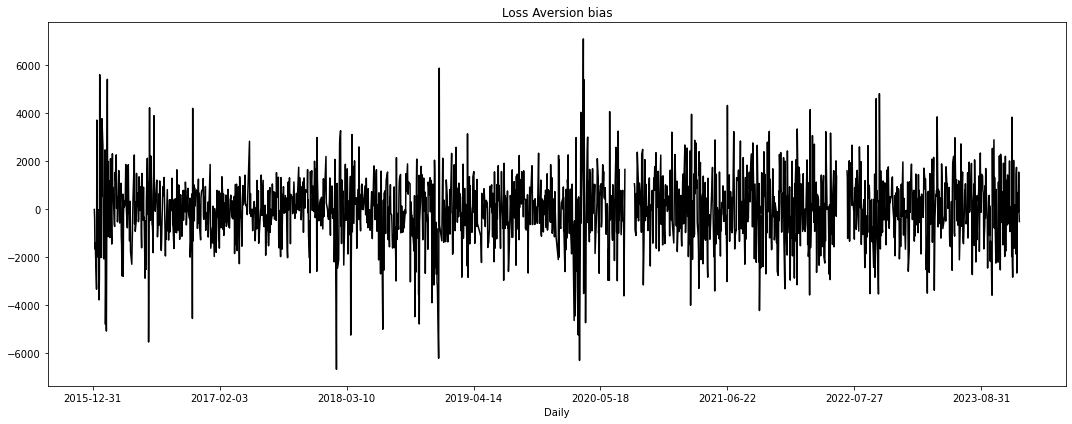

In [65]:
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
# Sort the dataframe by 'Date'
df_sr_total = df_sr_total.sort_values('Date')
#df_sr_total["Date"] = df_sr_total["Date"].dt.date
# Extract quarter information from 'Date' and assign it to 'Quarter'
df_sr_total['Quarter'] = pd.to_datetime(df_sr_total["Date"]).dt.to_period('Q')

# Create the plot
plt.figure(figsize=(15, 6))

# Plot 'CSAD' against 'Date'
plt.plot(df_sr_total['Date'].values, df_sr_total['mean'].values, linestyle='-', color='black')

# Set the title and labels
plt.title('Loss Aversion bias')
plt.xlabel('Daily')
#plt.ylabel('Cross-sectional absolute deviation')

# Adding quarter labels on the x-axis
# Ensure that the quarter labels do not overlap
quarter_labels = df_sr_total['Quarter'].astype(str)
#plt.xticks(CSAD_df['Date'][::60], quarter_labels[::60], rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both'))
# Add grid for better readability
#plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df_sr_total

In [ ]:
!pip uninstall statsmodels -y

In [ ]:
!pip install statsmodels

In [ ]:
!pip show numpy

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

In [ ]:
!pip install numpy<2

In [ ]:
!pip check

In [ ]:
!python --version
!pip --version


In [ ]:
!pip install numpy==1.24.3